# Mentorship Project

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

# Understanding the data

In [3]:
# Loading the data and understanding the data

Recruitment_df = pd.read_csv("Recruitment_Data.csv")

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [4]:
Recruitment_df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [5]:
Recruitment_df.shape

(446, 4)

There are 446 rows and 4 columns

In [6]:
Recruitment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [10]:
Recruitment_df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [7]:
cont_vars = ["attrition", "performance_rating", "sales_quota_pct"]
cato_vars = ["recruiting_source"]

In [8]:
# CHECKING THE MISSING VALUES AND IMPUTATION OF THE MISSING VALUES

Recruitment_df.isnull().mean()

attrition             0.000000
performance_rating    0.000000
sales_quota_pct       0.000000
recruiting_source     0.459641
dtype: float64

#There are some missing values in recruiting_source column but since it is categorical variable we need nor impute the values.

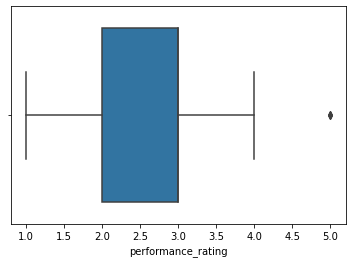

In [11]:
# CHECKING THE OUTLIERS AND DEALING WITH IT

sns.boxplot(Recruitment_df["performance_rating"])
plt.show()

In [12]:
performance_rating_q1 = 2.00
performance_rating_q3 = 3.00
performance_rating_iqr = 3.00 - 2.00
performance_rating_upper = 3.00+1.5*1.0
performance_rating_lower = 2.00-1.5*1.00

In [13]:
performance_rating_upper

4.5

In [14]:
for i in Recruitment_df["performance_rating"]:
          if i > performance_rating_upper:
            i=performance_rating_upper

Recruitment_df["performance_rating"]

0      3
1      3
2      2
3      2
4      3
      ..
441    3
442    4
443    4
444    4
445    2
Name: performance_rating, Length: 446, dtype: int64

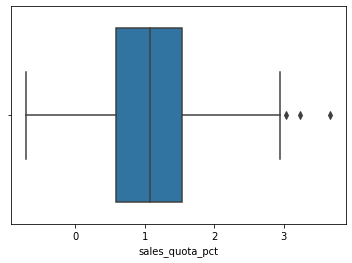

In [15]:
sns.boxplot(Recruitment_df["sales_quota_pct"])
plt.show()

In [16]:
sales_quota_pct_q1 = 0.58
sales_quota_pct_q3 = 1.53
sales_quota_pct_iqr = 1.53-0.58
sales_quota_pct_iqr 

0.9500000000000001

In [17]:
sales_quota_pct_upper = 1.53+1.5*0.95
sales_quota_pct_lower = 0.58-1.5*0.95
sales_quota_pct_upper

2.955

In [18]:
for i in Recruitment_df["sales_quota_pct"]:
        if i > sales_quota_pct_upper:
            i=sales_quota_pct_upper

Recruitment_df["sales_quota_pct"]

0      1.088190
1      2.394173
2      0.497530
3      2.513958
4      1.424789
         ...   
441    1.627813
442    0.689682
443    1.196198
444    1.598213
445    0.582642
Name: sales_quota_pct, Length: 446, dtype: float64

In [19]:
 # Grouping the data
grouping = Recruitment_df.groupby(["recruiting_source"]).groups

In [20]:
grouping

{'Applied Online': [0, 4, 6, 13, 16, 19, 24, 33, 34, 35, 48, 50, 54, 55, 67, 70, 71, 75, 84, 86, 88, 93, 95, 96, 98, 101, 102, 108, 109, 110, 113, 116, 118, 125, 135, 136, 141, 143, 150, 151, 152, 158, 159, 160, 169, 170, 173, 176, 178, 179, 180, 192, 193, 194, 202, 203, 209, 214, 231, 234, 236, 244, 245, 249, 251, 253, 254, 259, 263, 266, 268, 269, 274, 277, 281, 285, 290, 291, 293, 294, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 307, 315, 318, 320, 323, 332, 334, 349, 354, 355, ...], 'Campus': [2, 8, 12, 18, 28, 57, 65, 66, 80, 104, 114, 133, 137, 142, 145, 146, 148, 155, 156, 171, 175, 191, 196, 198, 199, 204, 205, 218, 221, 225, 226, 240, 250, 257, 271, 295, 306, 313, 316, 317, 337, 338, 340, 341, 344, 348, 367, 368, 372, 377, 385, 391, 411, 415, 439, 441], 'Referral': [5, 7, 25, 44, 47, 89, 94, 99, 112, 119, 124, 131, 134, 154, 165, 166, 181, 182, 189, 190, 197, 208, 211, 215, 237, 241, 243, 260, 262, 308, 312, 321, 324, 330, 345, 347, 352, 359, 380, 407, 419, 423, 428, 430

In [21]:
Recruitment_df.groupby(["recruiting_source"]).get_group("Applied Online")

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
4,0,3,1.424789,Applied Online
6,1,3,0.794213,Applied Online
13,0,3,0.362379,Applied Online
16,0,3,2.471433,Applied Online
...,...,...,...,...
432,0,5,1.393015,Applied Online
433,1,3,1.575000,Applied Online
437,0,2,0.632942,Applied Online
440,0,3,1.373085,Applied Online


In [22]:
Recruitment_df.groupby(["recruiting_source"]).get_group("Campus")

,attrition,performance_rating,sales_quota_pct,recruiting_source
2,1,2,0.497530,Campus
8,0,3,1.519917,Campus
12,0,4,0.860353,Campus
18,0,3,0.313106,Campus
28,0,3,1.218996,Campus
57,1,2,-0.020179,Campus
65,0,2,1.436988,Campus
66,0,3,-0.061590,Campus
80,0,3,0.502660,Campus
104,1,4,3.030340,Campus


In [23]:
Recruitment_df.groupby(["recruiting_source"]).get_group("Referral")

,attrition,performance_rating,sales_quota_pct,recruiting_source
5,1,3,0.548123,Referral
7,0,2,1.006524,Referral
25,0,3,0.988873,Referral
44,0,2,1.001372,Referral
47,1,3,0.195860,Referral
89,0,3,0.825791,Referral
94,0,2,1.327003,Referral
99,0,3,2.483459,Referral
112,0,3,0.793227,Referral
119,1,1,2.120180,Referral


In [24]:
Recruitment_df.groupby(["recruiting_source"]).get_group("Search Firm")

,attrition,performance_rating,sales_quota_pct,recruiting_source
27,1,2,1.867939,Search Firm
38,0,3,1.294592,Search Firm
105,1,3,1.258933,Search Firm
122,0,3,-0.064948,Search Firm
162,1,2,-0.628092,Search Firm
227,1,3,1.595868,Search Firm
311,0,3,1.325476,Search Firm
329,0,2,0.678046,Search Firm
395,1,3,1.352784,Search Firm
406,0,3,0.189004,Search Firm


In [25]:
mean_group = Recruitment_df.groupby(["recruiting_source"]).mean()
mean_group

,attrition,performance_rating,sales_quota_pct
recruiting_source,,,
Applied Online,0.246154,2.930769,1.058590
Campus,0.285714,2.928571,0.908035
Referral,0.333333,2.844444,1.023198
Search Firm,0.500000,2.700000,0.886960


By looking at the average values we can say that one of the best recruiting source is "Applied Online"as the applied online group have low attrition average and high sales average whereas the worst recruiting source would be the "Search Firm" which have high attrition and low sales value